In [4]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np

df = pd.read_csv('./Frequency/data.csv')

In [7]:
df

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,...,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10298,61970712,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,...,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,...,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,...,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


In [5]:
train,test = train_test_split(df, stratify=df['Claims'])
mu = df['Claims'].mean()
var = df['Claims'].var()

KeyError: 'Claims'

In [ ]:
print(f'mu={mu:.2}\nvar={var:.2}')

- Var > Mu, which means the data is over-dispersed. Poisson will not be a great fit, as poisson assumes Var == Mu. I will test with both
    - Over-dispersion here is likely due to high 0 counts (zero-inflated).

To address Zero-Inflated data, Negitive Binomial Model may fit.

In [ ]:
df

In [ ]:
expr = 'Claims ~ Age + Sex + Geog + EV + VehAge + NCD'

poisson = smf.glm(formula=expr,
                  data=train,
                  family=sm.families.Binomial(link=sm.families.links.log()),
                  # offset=np.log(train['PYrs'])
                 ).fit()

negBinomial = smf.glm(formula=expr,
                      data=train,
                      family=sm.families.NegativeBinomial(link=sm.families.links.log()),
                      # offset=np.log(train['PYrs'])
                     ).fit()

An offset is used to account for relative differences in exposure time. 

In [6]:
print(poisson.summary())
print(negBinomial.summary())

NameError: name 'poisson' is not defined

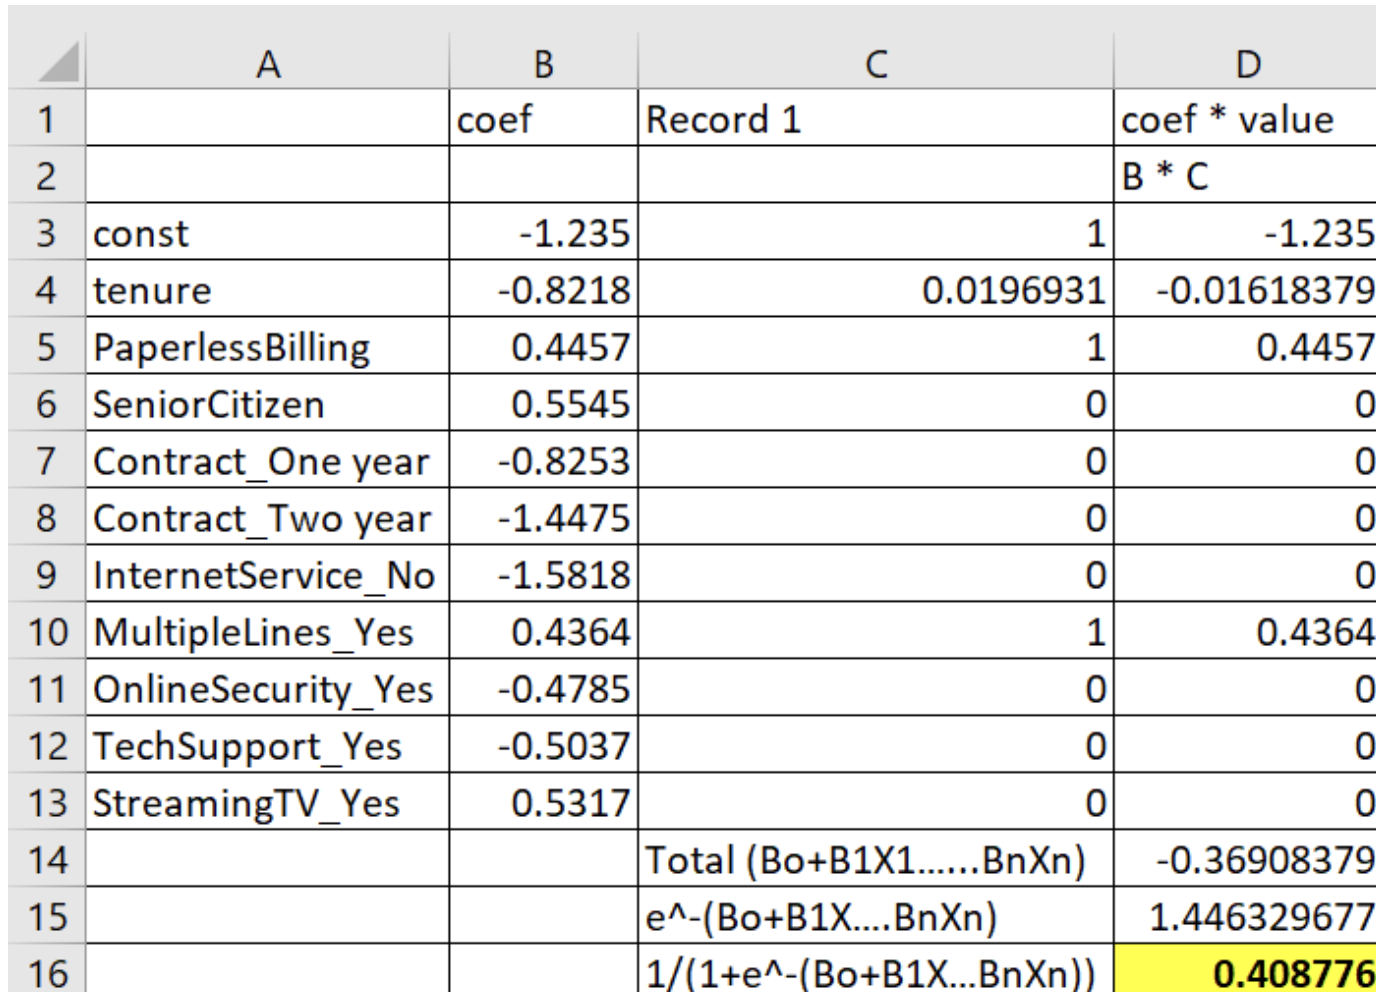
[Read more here](https://medium.com/@rush2hemant/what-do-coefficients-mean-in-glm-logistic-regression-model-5dd57085a0e4)

NameError: name 'poisson' is not defined

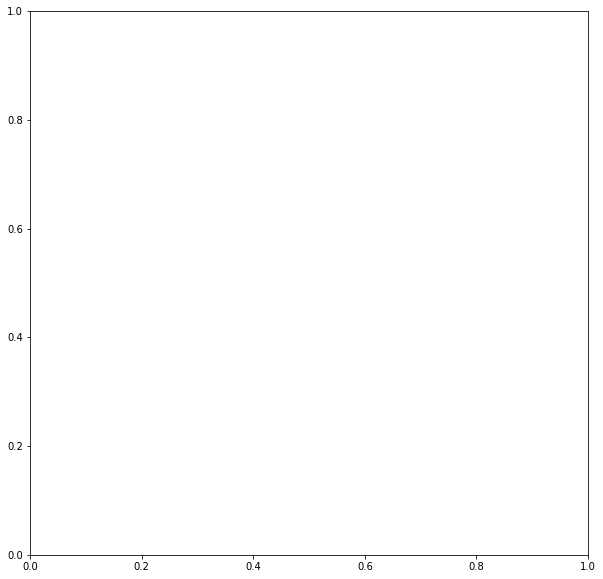

In [2]:
fig,axs=plt.subplots(1, figsize=(10,10))
steps = np.arange(1,50,1)
axs.plot(steps, [np.exp(poisson.params['Intercept'] + poisson.params['VehAge'] * i) for i in steps], label='PoissonVehicleAge')
axs.plot(steps, [np.exp(negBinomial.params['Intercept'] + negBinomial.params['VehAge'] * i) for i in steps], label='NegBinomialVehicleAge')
axs.legend()

NameError: name 'poisson' is not defined

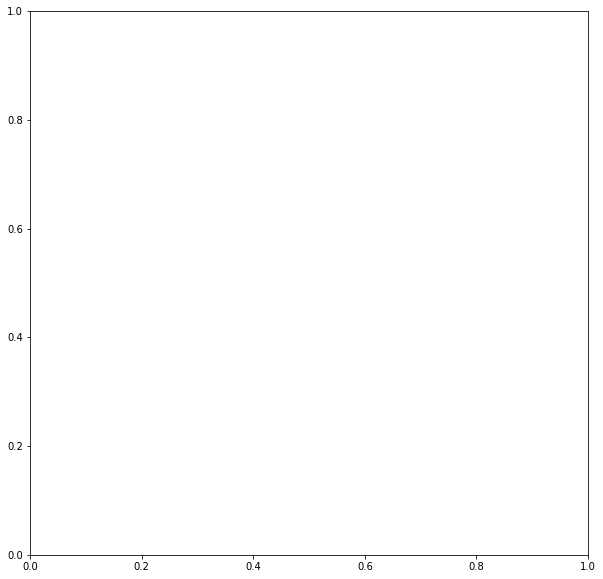

In [3]:
fig,axs=plt.subplots(1, figsize=(10,10))
steps = np.arange(1,50,1)
axs.plot(steps, [np.exp(poisson.params['Intercept'] + poisson.params['Age'] * i) for i in steps], label='PoissonAge')
axs.plot(steps, [np.exp(negBinomial.params['Intercept'] + negBinomial.params['Age'] * i) for i in steps], label='NegBinomialAge')
axs.legend()

In [46]:
[(poisson.params['Intercept'] + poisson.params['VehAge'] * i) for i in steps]

[-2.570637773285821,
 -2.6366425620635106,
 -2.7026473508411994,
 -2.7686521396188883,
 -2.8346569283965772,
 -2.9006617171742666,
 -2.9666665059519555,
 -3.032671294729645,
 -3.0986760835073337,
 -3.1646808722850226,
 -3.2306856610627115,
 -3.296690449840401,
 -3.3626952386180897,
 -3.428700027395779,
 -3.494704816173468,
 -3.560709604951157,
 -3.6267143937288457,
 -3.6927191825065346,
 -3.758723971284224,
 -3.824728760061913,
 -3.890733548839602,
 -3.956738337617291,
 -4.02274312639498,
 -4.088747915172669,
 -4.154752703950358,
 -4.220757492728048,
 -4.2867622815057365,
 -4.352767070283425,
 -4.418771859061114,
 -4.484776647838803,
 -4.550781436616493,
 -4.616786225394181,
 -4.682791014171871,
 -4.74879580294956,
 -4.8148005917272485,
 -4.880805380504937,
 -4.946810169282626,
 -5.012814958060316,
 -5.078819746838004,
 -5.144824535615694,
 -5.210829324393383,
 -5.276834113171072,
 -5.3428389019487605,
 -5.408843690726449,
 -5.474848479504139,
 -5.540853268281827,
 -5.606858057059517,
